In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'fiducial_tng100B_099S_0A_800R/results/'
hisubfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hiptlfile = pkl.load(open(path + 'hiptlXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
vnfile = pkl.load(open(path + 'vnXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))

flib_og = FigureLibrary()
flib_og.addResults(hisubfile)
flib_og.addResults(vnfile)
flib_og.addResults(hiptlfile)

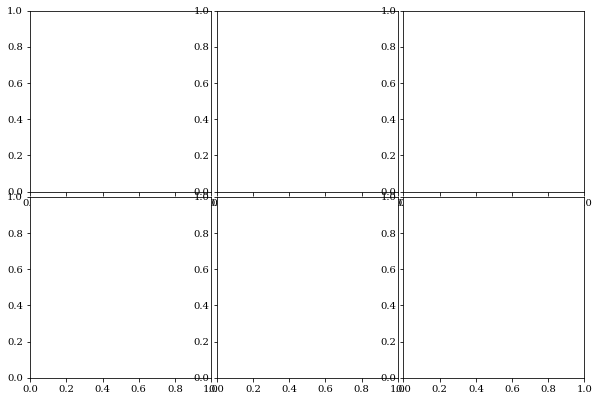

In [3]:
flib = copy.copy(flib_og)
flib.createFigGrid(2, 3, panel_length = 2.5)
figAreaRatio, panels = flib.getFig()
dim = flib.getDim()
figarr = np.empty(dim, dtype = object)
# making panel 0,0 results
idx = (0,0)
ipog = {}
ipog['color_cut'] = '0.60'
ipog['gal_res'] = 'diemer'
ipog['HI_res'] = 'diemer'
ipog['species'] = 'stmass'
# ipog['is_auto'] = 'False'

ipog['color'] = ['red', 'blue']
ipog['space'] = 'real'
real = flib.getMatchingResults(ipog, {})
figarr[idx] = real

# making panel 0, 1 results
idx = (0,1)

ipog['fieldname'] = ['hiptl', 'vn']
ipog['space'] = 'redshift'
figarr[idx] = flib.getMatchingResults(ipog, {})

# making panel 0, 2 results

idx = (0,2)
ipog['fieldname'] = ['hisubhalo']
figarr[idx] = flib.getMatchingResults(ipog, {})

In [4]:
numerators = figarr[0,0] + figarr[0,1] + figarr[0,2]
results = []
for num in numerators:
    
    ip = copy.copy(num.props)
    if 'blue' in ip['color']:
        ip['color'] = 'red'
        ip['fieldname'] = ip['fieldname'][0]
        del ip['result_runtime']
        denom = flib.getMatchingResults(ip, {})
    #     print(len(denom))
    #     print(denom[1].props)
        pr = PostResult()
        pr.computeRatio(num, denom[0])
        results.append(pr)
idx = (1, 0)
figarr[idx] = results

# making 1, 1 particle RSD
results = []
for num in figarr[0, 1]:
    ip = copy.copy(num.props)
    del ip['result_runtime']
    ip['space'] = 'real'
    ip['fieldname'] = ip['fieldname'][0]
    denom = flib.getMatchingResults(ip, {})
    pr = PostResult()
    pr.computeRatio(num, denom[0])
    results.append(pr)
idx = (1, 1)
figarr[idx] = results

# making 1, 2 galaxy RSD
results = []
for num in figarr[0,2]:
    ip = copy.copy(num.props)
    ip['space'] = 'real'
    ip['fieldname'] = ip['fieldname'][0]
    del ip['result_runtime']

    denom = flib.getMatchingResults(ip, {})
    pr = PostResult()
    pr.computeRatio(num, denom[0])
    results.append(pr)
idx = (1, 2)
figarr[idx] = results
flib.setResultArray(figarr, '', '', 'color')

In [5]:
facenames = ['gray', 'olive', 'tan']
facecolors = []
for i in range(len(facenames)):
    facecolors.append(mpl.colors.to_rgba(facenames[i], 0.3))

    
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        fill_kwargs = {'color':'blue'}
        fill_kwargs = {'alpha':0.5}
        if not idx == (1, 0):
            panels[idx].set_facecolor(facecolors[j])

            fill_kwargs['label'] = 'Blue Galaxies'
            flib.plotFill(idx, {'color':'blue'},
                         fill_kwargs = fill_kwargs)
            
            fill_kwargs['label'] = 'Red Galaxies'

            fill_kwargs['color'] = 'red'
            flib.plotFill(idx, {'color':'red'},
                         fill_kwargs = fill_kwargs)
        else:
#             fill_kwargs['label'] = r'P$_{\rm{blue}}$(k)/P$_{\rm{red}}$(k)'
            fill_kwargs['color'] = facenames[0]
            fill_kwargs['label'] = 'Real Space\nAll HI'
            flib.plotFill(idx, {'space':'real'},
                         fill_kwargs = fill_kwargs)
            fill_kwargs['color'] = facenames[1]
            fill_kwargs['label']='Redshift Space\nParticles'
            flib.plotFill(idx, {'space':'redshift','is_particle':True},
                         fill_kwargs = fill_kwargs)
            fill_kwargs['color'] = facenames[2]
            fill_kwargs['label'] = 'Redshift Space\nGalaxies'
            flib.plotFill(idx, {'space':'redshift','is_particle':False},
                         fill_kwargs = fill_kwargs)
        if i ==1:
            p = panels[idx]
            xlim = p.get_xlim()
            
            p.plot(xlim, [1, 1], color='k', linestyle = '--')


In [6]:
ratio_panels = [(1, i) for i in range(3)]

# axes
flib.xLimAdjustToNyquist(5)
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panels)
flib.matchAxisLimits()

# ticks
tickkwargs = {'labelsize':12}
flib.removeYTickLabels(panel_exceptions = ratio_panels + flib._defaultTickLabelPanelExceptions('y'))
flib.removeXTickLabels()
flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)
# flib.removeXTickLabels()
# labels
lkw = {}
lkw['fontsize'] = 10
lkw['loc'] = 'lower left'
flib.addLegend(kwargs = lkw)
lkw['loc'] = 'upper left'
flib.addLegend((1, 0), lkw)

labkw = {}
labkw['fontsize'] = 12
labkw['rotation'] = 'vertical'
# flib.axisLabel('y', subscript = '\\rm{HI-gal}', txt_kwargs = labkw)
flib.labelPanelAxis((0,0), 'y', r'P$_{\rm{HI-gal}}$(k) (Mpc/h)$^{-3}$', labkw)
flib.labelPanelAxis((1,0), 'y', r'P$_1$(k) / P$_2$(k)', labkw)

labkw['rotation'] = 'horizontal'
flib.axisLabel('x', txt_kwargs = labkw)

pklabels = ['Real Space\nAll HI', 'Redshift Space\nHI in Particles Only', 'Redshift Space\nHI in Galaxies Only']
spacing = [0.15, 0.15, 0.15]
# ratlabs = ['Blue/Red Ratio',]
ratlabs = ['', 'Particles RSD', 'Galaxies RSD']
for i in range(dim[1]):
    idx = (0, i)
    
    p = panels[idx]
    p.text(0.5, 1-spacing[i], pklabels[i], fontsize=10, ha = 'center', va = 'bottom', transform = p.transAxes)
    p = panels[(1, idx[1])]
    p.text(0.5, 1-spacing[i]+.05, ratlabs[i], fontsize=10, ha = 'center', va = 'bottom', transform = p.transAxes)




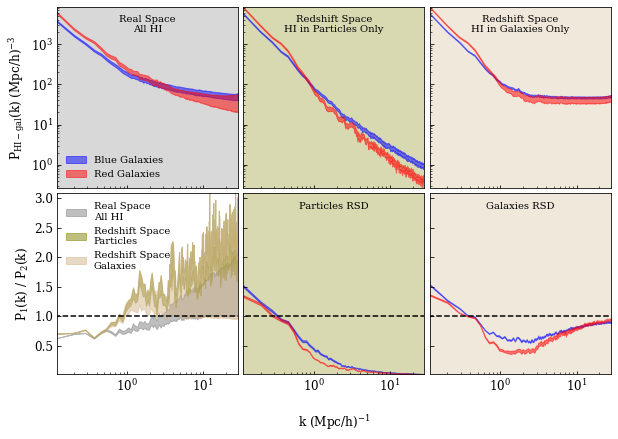

In [7]:
figAreaRatio

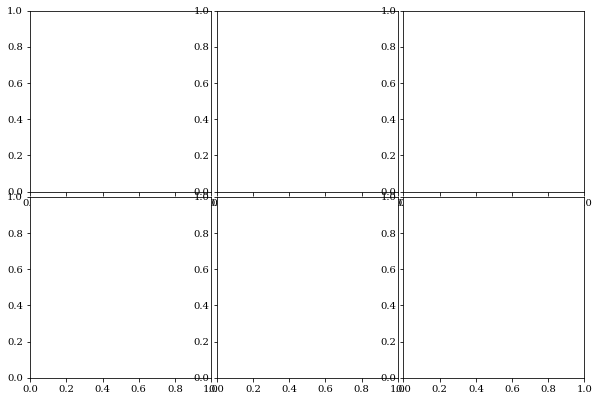

In [16]:
flib = copy.copy(flib_og)
flib.createFigGrid(2, 3, panel_length = 2.5)
figMedianRatio, panels = flib.getFig()
dim = flib.getDim()
figarr = np.empty(dim, dtype = object)
# making panel 0,0 results
idx = (0,0)
ipog = {}
ipog['color_cut'] = '0.60'
ipog['gal_res'] = 'diemer'
ipog['HI_res'] = 'diemer'
ipog['species'] = 'stmass'
# ipog['is_auto'] = 'False'

ipog['color'] = ['red', 'blue']
ipog['space'] = 'real'
real = flib.getMatchingResults(ipog, {})
figarr[idx] = real

# making panel 0, 1 results
idx = (0,1)

ipog['fieldname'] = ['hiptl', 'vn']
ipog['space'] = 'redshift'
figarr[idx] = flib.getMatchingResults(ipog, {})

# making panel 0, 2 results

idx = (0,2)
ipog['fieldname'] = ['hisubhalo']
figarr[idx] = flib.getMatchingResults(ipog, {})

In [17]:
numerators = figarr[0,0] + figarr[0,1] + figarr[0,2]
results = []
for num in numerators:
    
    ip = copy.copy(num.props)
    if 'blue' in ip['color']:
        ip['color'] = 'red'
        ip['fieldname'] = ip['fieldname'][0]
        del ip['result_runtime']
        denom = flib.getMatchingResults(ip, {})
    #     print(len(denom))
    #     print(denom[1].props)
        pr = PostResult()
        pr.computeRatio(num, denom[0])
        results.append(pr)
idx = (1, 0)
figarr[idx] = results

# making 1, 1 particle RSD
results = []
for num in figarr[0, 1]:
    ip = copy.copy(num.props)
    del ip['result_runtime']
    ip['space'] = 'real'
    ip['fieldname'] = ip['fieldname'][0]
    denom = flib.getMatchingResults(ip, {})
    pr = PostResult()
    pr.computeRatio(num, denom[0])
    results.append(pr)
idx = (1, 1)
figarr[idx] = results

# making 1, 2 galaxy RSD
results = []
for num in figarr[0,2]:
    ip = copy.copy(num.props)
    ip['space'] = 'real'
    ip['fieldname'] = ip['fieldname'][0]
    del ip['result_runtime']

    denom = flib.getMatchingResults(ip, {})
    pr = PostResult()
    pr.computeRatio(num, denom[0])
    results.append(pr)
idx = (1, 2)
figarr[idx] = results
flib.setResultArray(figarr, '', '', 'color')

In [18]:
facenames = ['gray', 'olive', 'tan']
facecolors = []
for i in range(len(facenames)):
    facecolors.append(mpl.colors.to_rgba(facenames[i], 0.3))

    
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        fill_kwargs = {'color':'blue'}
        fill_kwargs = {'alpha':0.5}
        if not idx == (1, 0):
            panels[idx].set_facecolor(facecolors[j])

            fill_kwargs['label'] = 'Blue Galaxies'
            flib.plotFill(idx, {'color':'blue'},
                         fill_kwargs = fill_kwargs)
            
            fill_kwargs['label'] = 'Red Galaxies'

            fill_kwargs['color'] = 'red'
            flib.plotFill(idx, {'color':'red'},
                         fill_kwargs = fill_kwargs)
        else:
#             fill_kwargs['label'] = r'P$_{\rm{blue}}$(k)/P$_{\rm{red}}$(k)'
            fill_kwargs['color'] = facenames[0]
            fill_kwargs['label'] = 'Real Space\nAll HI'
            flib.plotMedian(idx, {'space':'real'},
                         line_kwargs = fill_kwargs)
            fill_kwargs['color'] = facenames[1]
            fill_kwargs['label']='Redshift Space\nParticles'
            flib.plotMedian(idx, {'space':'redshift','is_particle':True},
                         line_kwargs = fill_kwargs)
            fill_kwargs['color'] = facenames[2]
            fill_kwargs['label'] = 'Redshift Space\nGalaxies'
            flib.plotMedian(idx, {'space':'redshift','is_particle':False},
                         line_kwargs = fill_kwargs)
        if i ==1:
            p = panels[idx]
            xlim = p.get_xlim()
            
            p.plot(xlim, [1, 1], color='k', linestyle = '--')


In [19]:
ratio_panels = [(1, i) for i in range(3)]

# axes
flib.xLimAdjustToNyquist(5)
flib.flushYAxisToData()
flib.logAxis('x')
flib.logAxis('y', panel_exceptions = ratio_panels)
flib.matchAxisLimits()

# ticks
tickkwargs = {'labelsize':12}
flib.removeYTickLabels(panel_exceptions = ratio_panels + flib._defaultTickLabelPanelExceptions('y'))
flib.removeXTickLabels()
flib.removeDefaultTickLabels()
flib.changeTickParams(tickkwargs)
# flib.removeXTickLabels()
# labels
lkw = {}
lkw['fontsize'] = 10
lkw['loc'] = 'lower left'
flib.addLegend(kwargs = lkw)
lkw['loc'] = 'upper left'
flib.addLegend((1, 0), lkw)

labkw = {}
labkw['fontsize'] = 12
labkw['rotation'] = 'vertical'
# flib.axisLabel('y', subscript = '\\rm{HI-gal}', txt_kwargs = labkw)
flib.labelPanelAxis((0,0), 'y', r'P$_{\rm{HI-gal}}$(k) (Mpc/h)$^{-3}$', labkw)
flib.labelPanelAxis((1,0), 'y', r'P$_1$(k) / P$_2$(k)', labkw)

labkw['rotation'] = 'horizontal'
flib.axisLabel('x', txt_kwargs = labkw)

pklabels = ['Real Space\nAll HI', 'Redshift Space\nHI in Particles Only', 'Redshift Space\nHI in Galaxies Only']
spacing = [0.15, 0.15, 0.15]
# ratlabs = ['Blue/Red Ratio',]
ratlabs = ['', 'Particles RSD', 'Galaxies RSD']
for i in range(dim[1]):
    idx = (0, i)
    
    p = panels[idx]
    p.text(0.5, 1-spacing[i], pklabels[i], fontsize=10, ha = 'center', va = 'bottom', transform = p.transAxes)
    p = panels[(1, idx[1])]
    p.text(0.5, 1-spacing[i]+.05, ratlabs[i], fontsize=10, ha = 'center', va = 'bottom', transform = p.transAxes)




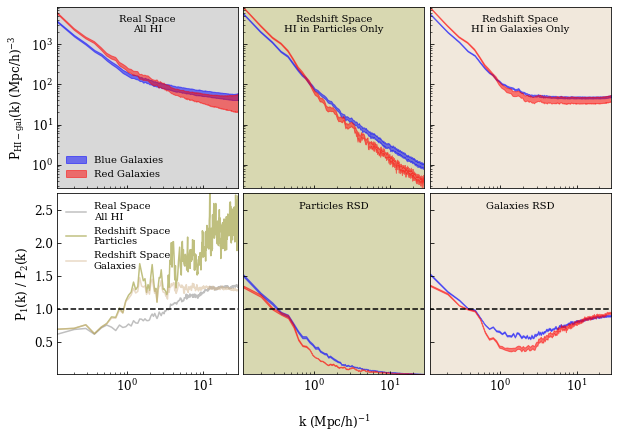

In [20]:
figMedianRatio